# Assignment 2

The purpose of this assignment is to test your understanding of Classification.  You will use the Titanic dataset and your goal is to predict whether a passenger Survives based on the passenger's features.


# Instructions

## General

1. Use the same train and test datasets as was used in the lecture.  Instructions below for where to find them.

2. As usual: your grade depends on **both** the correct answer and properly presenting your process (as in the "Recipe" taught in class, and the Geron book Appendix B)

3. You will classify whether a passenger Survives or not using Logistic Regression.

4. You may use the code presented in class to **start** your assignment but I expect you to significantly enhance it.  For example: you may use my code to get you started with plotting but it is up to you to decide whether this alone suffices.

5. Use 5-fold cross validation for all models.  Report the average as your result.


## Specific goals to address

1. Use a baseline model against which you will compare your models.
    - Discuss your choice.  Is this the best baseline model to use ?
    - Create a variable SCORE_BASELINE that contains a Python scalar value: the accuracy for your baseline model.
2. You will conduct several experiments 
    - present a Confusion Matrix for each experiment and discuss
    - you will create several variables per experiment that will be used for grading.
        - The variables for experiment 1 will have suffix "_1". For experiment 2, they will have suffix "_2", etc.
3. Experiment 1
    - You will *extend* the results presented in the lecture
        - use the same features
        - use the same way of dealing with missing features
        - be sure to treat categorical features correctly
     
    - Create a variable SCORE_1 that contains a Python scalar value: the accuracy for your experiment.
    - Create a variable MISCLASSIFIED_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the identity of passengers that were mis-classified as Surviving.
        - the "identity" of a passenger should be given as the  *row number* within the test data set,
        - The first row is considered row 0
    - Create a variable MISCLASSIFIED_NOT_SURVIVE_1 that contains a Python list of *at least 10* passengers
        - the list should contain the "identity" of passengers that were mis-classified as Not Surviving.
        - The "identity" of a passenger should be given as the  *row number* within the test data set, as above
4. Experiment 2
    - Turn Age from a continous variable to one that is assigned to buckets.
        - You will decide the range for each bucket.  Discuss your choice
        - Treat the buckets as categorical features
    - Compare your prediction to the previous experiment and discuss
    - Create variables SCORE_2, MISCLASSIFIED_SURVIVE_2, MISCLASSIFIED_NOT_SURVIVE_2 analagous to the variables in Experiment 1
        
The correctness part of your grade will depend on the values you assign to these variables.    

# Extra credit

Create your own Logistic Regression model for the Titanic dataset given !
- Feel free to change **anything**, e.g., features or ways to treat missing values
- We will create a hidden test dataset
- Students whose model accuracy (evaluated on the hidden test dataset) are in the Top 33% of the class get extra credit !


# Getting the data 
You may obtain the train and test datasets from the repository using code from the following cell.

**NOTE** You may need to change the NOTEBOOK_ROOT variable to point to the directory into which you've cloned the repository.  On my machine, it is `~/Notebooks/NYU`.

In [1]:
import pandas as pd
import os

NOTEBOOK_ROOT = "F:/nyu 19spring/ml7773/ml0222/ML_Spring_2019-master"
TITANIC_PATH = os.path.join( NOTEBOOK_ROOT, "external/jack-dies", "data")

train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data  = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv")  )

In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data description
We can take a look at missing data and categorical data.

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
(num_obs, num_features) = train_data.shape
print("There are {nr} observations and {nf} attributes (including the target)".format(nr=num_obs, nf=num_features) )

There are 891 observations and 12 attributes (including the target)


### Features of "Age", "Embarked" and "Cabin" have missing values.
### "PassengerId", "Name", "Pclass","Sex", "Ticket", "Cabin", "Embarked" are categorical features. "Age", "SibSp", "Parch", "Fare" are numeric features. 
### "Survived" is our target.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### The instructions of assignment shows that we should use the same features as in the lecture, so we choose "Age", "SibSp", "Parch", "Fare", "Sexint", "Pclass" to analyze our baseline.

### To use pipeline to create dummy values of categorical features, we need to transfer string to int.
### Create a new column to  store sex data.

In [7]:
sex_mapDict={'male':1,'female':2}
train_data['Sexint']=train_data['Sex'].map(sex_mapDict)

### Create numeric features pipelines

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder# A class to select numerical or categorical columns
from sklearn.pipeline import FeatureUnion
# since Scikit-Learn doesn't handle DataFrames yet
from sklearn.pipeline import Pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
num_features = ["Age", "SibSp", "Parch", "Fare"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),("imputer", 
                                                           SimpleImputer(strategy="median")),])

### Create categorical features pipeline. I use dummy variables for multinomial features.

In [9]:
import numpy as np
#train_data['Sex'=='male']=0
#train_data['Sex'=='female']=1
#train_data
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
class SexToInt(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        #print("SexToInt:transform: Cheating alert!, X has {c} columns.".format(c=X.shape[-1]) )
        sex = X["Sex"]
        X["Sex"] = 0
        X[ sex == "female" ] = 1
        return(X)
cat_features = ["Sexint", "Pclass" ]
cat_pipeline = Pipeline([("select_cat", DataFrameSelector( cat_features )),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse=False))])
#train_data.loc[:,['Sex','Pclass']]=np.array(cat_pipeline.fit_transform(train_data))
#xarray=cat_pipeline.fit_transform(train_data)
#xarray

### I use features union to create a pipeline for both numeric and categorical features.

In [10]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline",
                                                                                     cat_pipeline),])
X_train = preprocess_pipeline.fit_transform(train_data)

In [11]:
y_train=np.array(train_data.loc[:,'Survived'])
y_train.shape

(891,)

### Baseline choose

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
strats = { "stratified": {},"uniform": {},"constant": {"constant": 0}}
plt_num = 1
# Compute Accuracy for various baseline classifiers
for strat, args in strats.items():
    dmy_clf = DummyClassifier(strategy=strat, **args)
    print(dmy_clf)
    acc_scores_dmy = cross_val_score(dmy_clf, X_train, y_train,scoring="accuracy",cv=5)
    SCORE_BASELINE=acc_scores_dmy.mean()
    print("{s}: SCORE_BASELINE = {a:.2f}".format(s=strat, a=SCORE_BASELINE))

DummyClassifier(constant=None, random_state=None, strategy='stratified')
stratified: SCORE_BASELINE = 0.54
DummyClassifier(constant=None, random_state=None, strategy='uniform')
uniform: SCORE_BASELINE = 0.49
DummyClassifier(constant=0, random_state=None, strategy='constant')
constant: SCORE_BASELINE = 0.62


### When we use baseline which predicts always 0, which is not survived, we get the highest score. Therefore, we choose constant baseline as our baseline.

## Experiment1 logistic model

### Calculate the SCORE_1

In [13]:
from sklearn.linear_model import LogisticRegression
titan_lr_clf = LogisticRegression(C=200. / len(X_train),solver='saga', tol=0.0001)
SCORE_1 = cross_val_score(titan_lr_clf, X_train, y_train,scoring="accuracy",cv=5).mean()
print("SCORE_1 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_1) )

D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


SCORE_1 with l2 penalty:0.6892


### Define function to get confusion matrix

In [14]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
    # Normalize by row sums
        cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around( 100 * cm_pct, decimals=0).astype(int)
        print("Normalized confusion matrix") 
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Plot coordinate system has origin in upper left corner
        # - coordinates are (horizontal offset, vertical offset)
        # - so cm[i,j] should appear in plot coordinate (j,i)
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

from sklearn.metrics import confusion_matrix
y_pred=cross_val_predict(titan_lr_clf, X_train, y_train,cv=5)
conf_mx=confusion_matrix(y_train,y_pred)
print(conf_mx)

D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[503  46]
 [231 111]]


Confusion matrix, without normalization


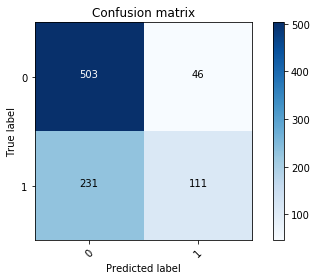

In [15]:
plot_confusion_matrix(conf_mx, range(2))

### Normlize confusion matrix

Normalized confusion matrix


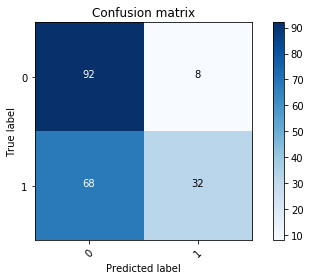

In [16]:
plot_confusion_matrix(conf_mx, range(2),normalize=True)

### Print misclassified data. 

In [17]:
MISCLASSIFIED_SURVIVE_1=[]
MISCLASSIFIED_NOT_SURVIVE_1=[]
for i in range(0,len(y_train)):
    if (y_train[i]==0 and y_pred[i]==1):
        MISCLASSIFIED_SURVIVE_1.append(i) 
    if (y_train[i]==1 and y_pred[i]==0):
        MISCLASSIFIED_NOT_SURVIVE_1.append(i) 

print("MISCLASSIFIED_SURVIVE_1[0:10]:{s}".format(s=MISCLASSIFIED_SURVIVE_1[0:10]) )
print("MISCLASSIFIED_NOT_SURVIVE_1[0:10]:{s}".format(s=MISCLASSIFIED_NOT_SURVIVE_1[0:10]) )

MISCLASSIFIED_SURVIVE_1[0:10]:[7, 16, 24, 27, 34, 50, 59, 62, 63, 71]
MISCLASSIFIED_NOT_SURVIVE_1[0:10]:[2, 3, 8, 11, 15, 17, 19, 21, 22, 23]


## Experiment 2

### Turn Age from a continous variable to one that is assigned to buckets.
### At first, I describe the age and take a look at the distribution of the age.

In [18]:
train_data.loc[:,'Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### I use median to fill the missling values and sort the data. We can see that some people have the same age.

In [19]:
agedata=train_data[['Age']].fillna(train_data['Age'].median())
agedata["Survived"]=train_data[["Survived"]]
agedata=agedata.sort_values(by= ['Age'],ascending = True)
agedata.reset_index(drop=True, inplace=True)
print(agedata.head())

    Age  Survived
0  0.42         1
1  0.67         1
2  0.75         1
3  0.75         1
4  0.83         1


### I calculate the mean of survived of every age to have a look at the distribution of survived among different ages

In [20]:
df=agedata.groupby(['Age']).mean()
df.reset_index(inplace=True)
print(df)

      Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.500000
66  51.00  0.285714
67  52.00  0.500000
68  53.00  1.000000
69  54.00  0.375000
70  55.00  0.500000
71  55.50  0.000000
72  56.00  0.500000
73  57.00  0.000000
74  58.00  0.600000
75  59.00  0.000000


### draw the picture of the mean of survived of every age

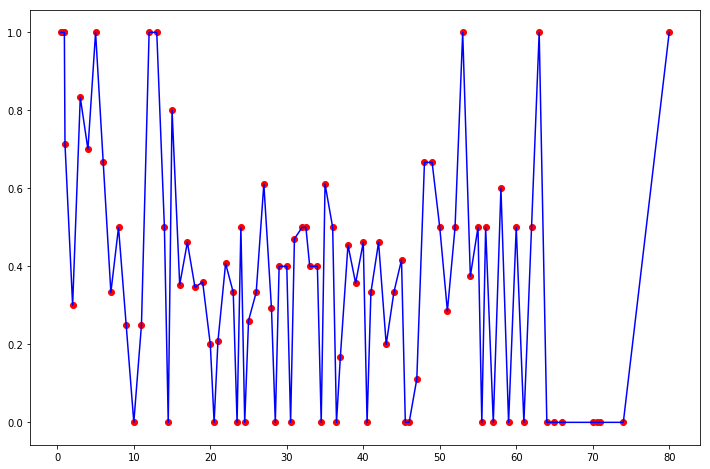

In [21]:
plt.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
_ = ax.scatter(df.loc[:]['Age'], df.loc[:]["Survived"], color='red')
_ = ax.plot(df.loc[:]['Age'], df.loc[:]["Survived"], color='blue')

### Through the plot above, we can see that the age before 15 and after 63 has more volatility, and the age between 15 and 63 is more stable. Therefore, I divide the age into 3 buckets: [0,15],(15,63],(63,80]

In [22]:
listBins = [-1, 15, 63,80]
listLabels = [1,2,3]
train_data['Agebins']=pd.cut(train_data.loc[:]['Age'],listBins,right=True,labels=listLabels,precision=3)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexint,Agebins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


## Use pipeline to transform train_data

In [23]:
num_features = ["SibSp", "Parch", "Fare"]
cat_features = ["Agebins","Sexint", "Pclass" ]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),("imputer", 
                                                           SimpleImputer(strategy="median")),])
cat_pipeline = Pipeline([("select_cat", DataFrameSelector( cat_features )),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse=False))])
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                                     ("cat_pipeline", cat_pipeline),])
X_train = preprocess_pipeline.fit_transform(train_data)
X_train.shape

(891, 11)

### I get the SCORE_2 of experiment 2.

In [24]:
SCORE_2 = cross_val_score(titan_lr_clf, X_train, y_train,scoring="accuracy",cv=5).mean()
print("SCORE_1 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_1) )
print("SCORE_2 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_2) )

SCORE_1 with l2 penalty:0.6892
SCORE_2 with l2 penalty:0.7240


D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### After dividing age into 3 groups, the average score of cross validation is improved, which shows that it is more accurate when using age as buckets.

### This is confusion matrix without normalization

D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix, without normalization


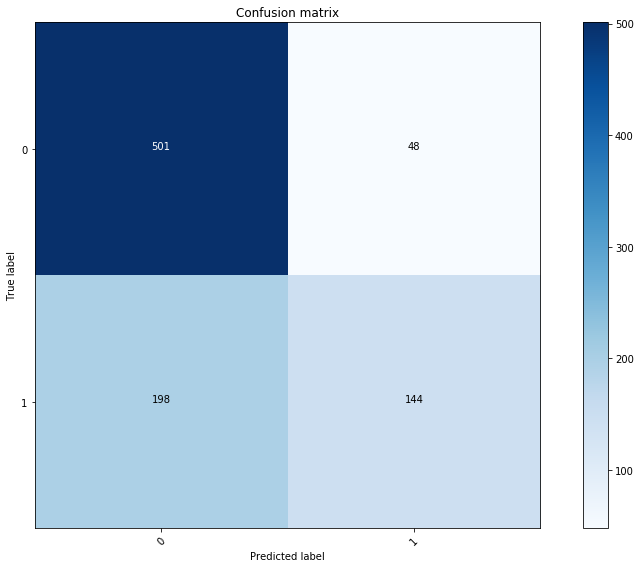

In [25]:
y_pred2=cross_val_predict(titan_lr_clf, X_train, y_train,cv=5)
conf_mx=confusion_matrix(y_train,y_pred2)
plot_confusion_matrix(conf_mx, range(2))

### This is confusion matrix with normalization

Normalized confusion matrix


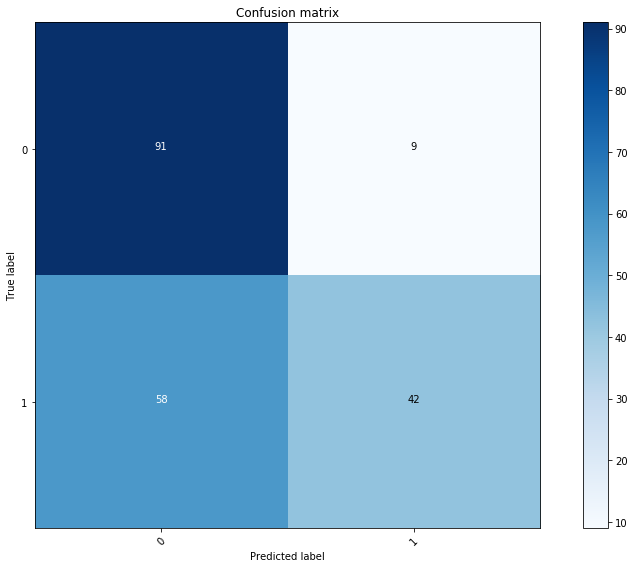

In [26]:
plot_confusion_matrix(conf_mx, range(2),normalize=True)

### Print misclassified data. 

In [27]:
MISCLASSIFIED_SURVIVE_2=[]
MISCLASSIFIED_NOT_SURVIVE_2=[]
for i in range(0,len(y_train)):
    if (y_train[i]==0 and y_pred2[i]==1):
        MISCLASSIFIED_SURVIVE_2.append(i) 
    if (y_train[i]==1 and y_pred2[i]==0):
        MISCLASSIFIED_NOT_SURVIVE_2.append(i) 
    
print("MISCLASSIFIED_SURVIVE_1[0:10]:{s}".format(s=MISCLASSIFIED_SURVIVE_1[0:10]) )
print("MISCLASSIFIED_NOT_SURVIVE_1[0:10]:{s}".format(s=MISCLASSIFIED_NOT_SURVIVE_1[0:10]) )
print("MISCLASSIFIED_SURVIVE_2[0:10]:{s}".format(s=MISCLASSIFIED_SURVIVE_2[0:10]) )
print("MISCLASSIFIED_NOT_SURVIVE_2[0:10]:{s}".format(s=MISCLASSIFIED_NOT_SURVIVE_2[0:10]) )

MISCLASSIFIED_SURVIVE_1[0:10]:[7, 16, 24, 27, 34, 50, 59, 62, 63, 71]
MISCLASSIFIED_NOT_SURVIVE_1[0:10]:[2, 3, 8, 11, 15, 17, 19, 21, 22, 23]
MISCLASSIFIED_SURVIVE_2[0:10]:[6, 27, 34, 35, 54, 62, 72, 83, 92, 96]
MISCLASSIFIED_NOT_SURVIVE_2[0:10]:[2, 8, 10, 17, 19, 21, 22, 25, 28, 32]


## Extra credits

### I find there is some title in name, such as capt and col, which may have influence on target value.

### Get the title from the name

In [28]:
def getTitle(name):
    str1=name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3
titledf=pd.DataFrame()
titledf['Title']=train_data['Name'].map(getTitle)
titledf['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Ms                1
Sir               1
Lady              1
Don               1
Capt              1
the Countess      1
Mme               1
Name: Title, dtype: int64

### Different titles may have the same level, so we map again.

In [29]:
title_mapDict={'Capt':'Officer','Col':'Officer','Major':'Officer','Jonkheer':'Royalty','Don':'Royalty',
               'Sir':'Royalty','Dr':'Officer','Rev':'Officer','the Countess':'Royalty','Dona':'Royalty',
               'Mme':'Mrs','Mlle':'Miss','Ms':'Mrs','Mr':'Mr','Mrs':'Mrs','Miss':'Miss','Master':'Master',
               'Lady':'Royalte',}
titledf['Title']=titledf['Title'].map(title_mapDict)
titledf['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      4
Royalte      1
Name: Title, dtype: int64

### To use One-Hot encoding in pipeline, I transfer level to number

In [30]:
title_mapDict1={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Officer':5,'Royalty':6,"Royalte":7,}
train_data["Title"]=titledf["Title"].map(title_mapDict1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexint,Agebins,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,1


### Use pipeline to transfer data

In [31]:
num_features = ["SibSp", "Parch", "Fare"]
cat_features = ["Agebins","Sexint", "Pclass", "Title"]
num_pipeline = Pipeline([("select_numeric", DataFrameSelector( num_features )),("imputer", 
                                                           SimpleImputer(strategy="median")),])
cat_pipeline = Pipeline([("select_cat", DataFrameSelector( cat_features )),
                         ("imputer", MostFrequentImputer()),
                         ("cat_encoder", OneHotEncoder(sparse=False))])
preprocess_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                                     ("cat_pipeline", cat_pipeline),])
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 1.    ,  0.    ,  7.25  , ...,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  0.    , 71.2833, ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  7.925 , ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 1.    ,  2.    , 23.45  , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , 30.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  7.75  , ...,  0.    ,  0.    ,  0.    ]])

### To rescale data, we normalize data.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[:,0:3]=scaler.fit_transform(X_train[:,0:3])

### Finally, we get the SCORE_3, which is better than SCORE_1 and SCORE_2.

In [33]:
SCORE_3 = cross_val_score(titan_lr_clf, X_train, y_train,scoring="accuracy",cv=5).mean()
# print('Best C % .4f' % clf.C_)
#print("Sparsity with {p} penalty: {s:.2f}.".format(p=titan_lr_clf.penalty, s=sparsity) )
print("SCORE_1 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_1) )
print("SCORE_2 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_2) )
print("SCORE_3 with {p} penalty:{s:.4f}".format(p=titan_lr_clf.penalty, s=SCORE_3) )

D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


SCORE_1 with l2 penalty:0.6892
SCORE_2 with l2 penalty:0.7240
SCORE_3 with l2 penalty:0.8193


D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Print confusion matrix

D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\aconoda\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Confusion matrix, without normalization


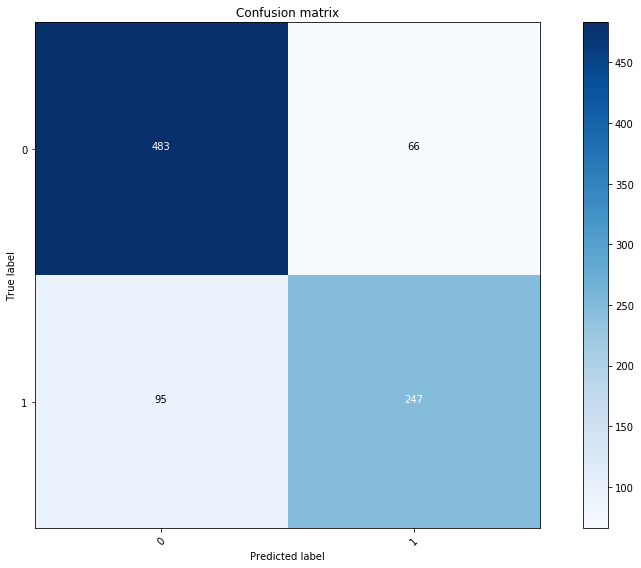

In [34]:
y_pred=cross_val_predict(titan_lr_clf, X_train, y_train,cv=5)
conf_mx=confusion_matrix(y_train,y_pred)
plot_confusion_matrix(conf_mx, range(2))

Normalized confusion matrix


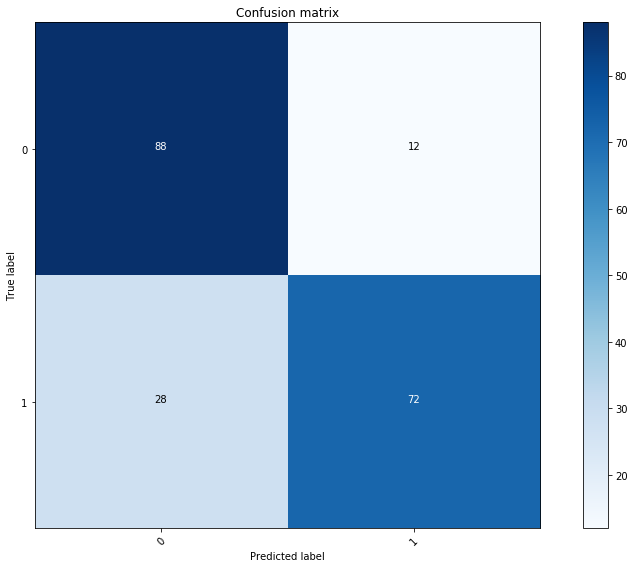

In [35]:
plot_confusion_matrix(conf_mx, range(2),normalize=True)

### After adding the feature "Title", the average of score has been improved a lot, which shows the feature "Title" is an important feature.